# Bar Graph

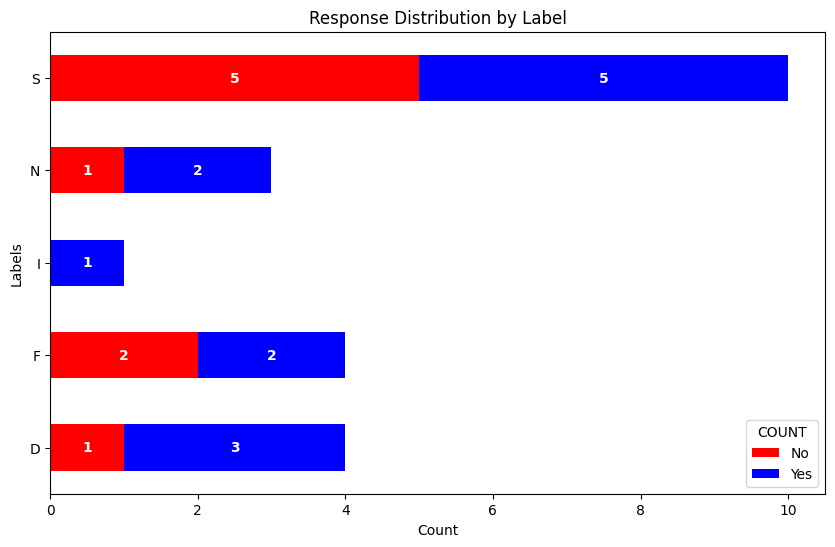

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_bar = pd.read_csv("data/bar_assignment.csv")

# Transform data
df_bar['COUNT'] = df_bar['COUNT'].replace({1: 'Yes', 0: 'No'})

# Group data
summary = df_bar.groupby(['LABEL', 'COUNT']).size().unstack(fill_value=0)

# Plot bar graph
ax = summary.plot(kind='barh', stacked=True, color=['red', 'blue'], figsize=(10, 6))

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Labels')
plt.title('Response Distribution by Label')

# Function to add value labels on bars
def add_value_labels(ax):
    for rect in ax.containers:
        for bar in rect:
            width = bar.get_width()
            x = bar.get_x() + width/2
            y = bar.get_y() + bar.get_height()/2
            
            if width > 0:
                label = int(width)
                ax.text(x, y, label, 
                       ha='center', va='center',
                       color='white', fontweight='bold')

# Add the value labels
add_value_labels(ax)

# Save to img folder
plt.savefig("img/bar_graph.png", bbox_inches='tight')

# Show plot
plt.show()